### Overview
+ CASENUM- Case number to identify the claim, a numeric vector
+ ATTORNEY Whether the claimant is represented by an attorney (=1 if yes and =2 if no)
+ CLMSEX Claimant’s gender (=1 if male and =2 if female), a numeric vector
+ CLMINSUR Whether or not the driver of the claimant’s vehicle was uninsured (=1 if yes, =2 if no)
+ SEATBELT Whether or not the claimant was wearing a seatbelt/child restraint (=1 if yes, =2 if no)
+ CLMAGE Claimant’s age, a numeric vector
+ LOSS The claimant’s total economic loss (in thousands)

### Problem Statement

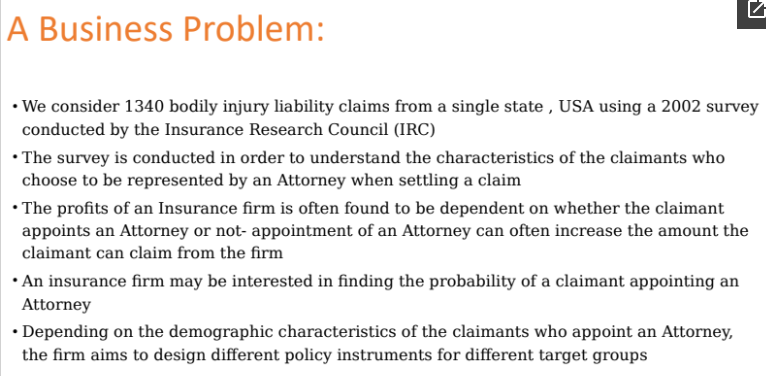

In [25]:
ImageGrab.grabclipboard()

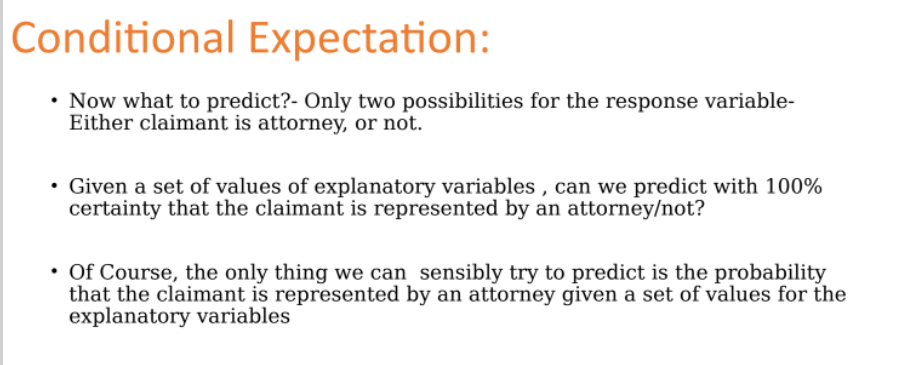

In [76]:
from PIL import ImageGrab
ImageGrab.grabclipboard()

In [ ]:
# Importing libraries

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the dataset

In [12]:
df = pd.read_csv('claimants.csv')
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [9]:
# shape of the dataset
df.shape

(1340, 7)

In [75]:
df.CLMINSUR.unique()

array([1., 0.])

In [13]:
# Dropping the case number columns as it has Unique values and it is not contributing to the inferences
df.drop('CASENUM', axis=1, inplace = True)
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


### Desciptive Statistics

In [36]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


### Count of Duplicated Rows

In [4]:
df.duplicated().sum()

26

In [5]:
df[df.duplicated()].shape

(26, 6)

#### print the duplicated rows

In [39]:
df[df.duplicated()]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
77,1,1.0,1.0,0.0,NaN,0.000
162,1,1.0,1.0,0.0,NaN,0.800
439,1,0.0,1.0,0.0,57.0,3.889
697,1,0.0,1.0,0.0,NaN,0.400
773,0,0.0,1.0,0.0,NaN,4.395
779,1,1.0,1.0,0.0,NaN,0.000
788,1,0.0,1.0,0.0,NaN,0.150
834,0,1.0,1.0,0.0,48.0,1.050
866,1,1.0,1.0,0.0,30.0,0.300
942,0,1.0,1.0,0.0,8.0,0.100


In [23]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

### Missing Values

<AxesSubplot:>

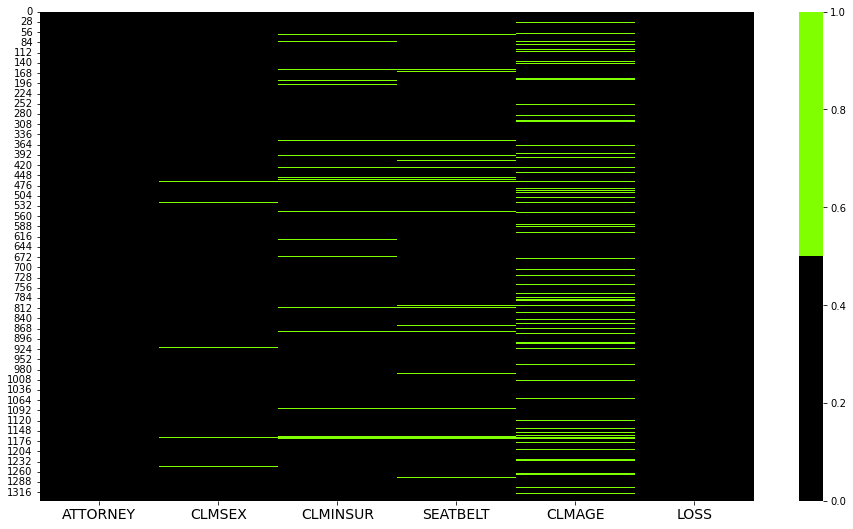

In [40]:
plt.figure(figsize = (16,9))
plt.xticks(fontsize = 14)
cols= df.columns
colors = ['#000000','#7FFF00']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))

### Exploratory Data Analysis

#### Since there are many missing values, we need to find the relationship between missing values and SalesPrice

Let's plot some diagram for this relationship

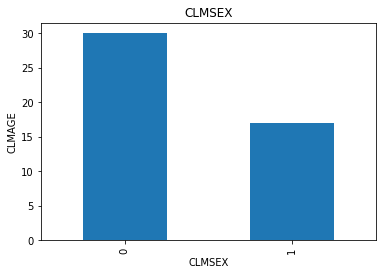

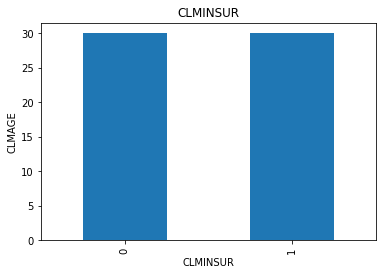

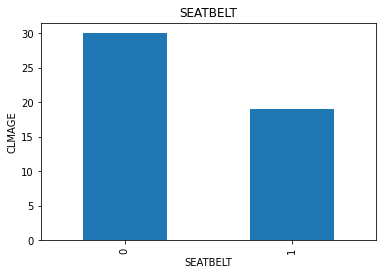

In [27]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    if feature!="CLMAGE":
        data=df.copy()
    
# Let's make a variable that indicates 1 if the observation was missing or zero
        data[feature]=np.where(data[feature].isnull(),1,0)

# Let's calculate the mean SalePrice where the information is missing or present
        data.groupby(feature)['CLMAGE'].median().plot.bar()
        plt.ylabel('CLMAGE')
        plt.title(feature)
        plt.show()

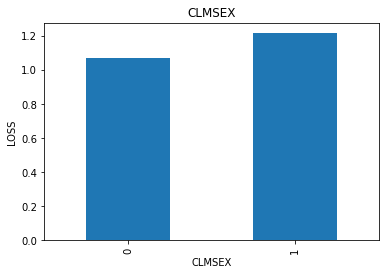

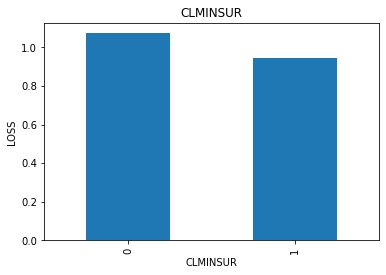

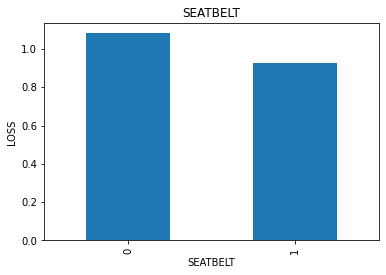

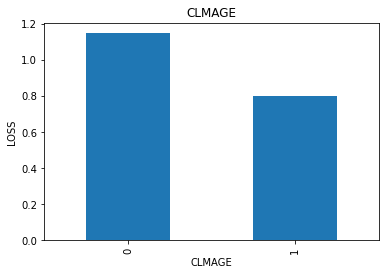

In [28]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    data=df.copy()
    
# Let's make a variable that indicates 1 if the observation was missing or zero
    data[feature]=np.where(data[feature].isnull(),1,0)

# Let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['LOSS'].median().plot.bar()
    plt.ylabel('LOSS')
    plt.title(feature)
    plt.show()

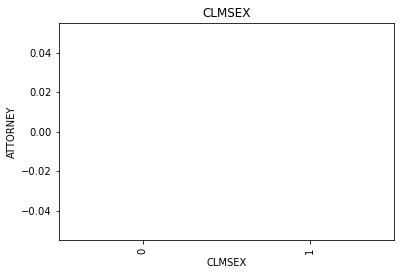

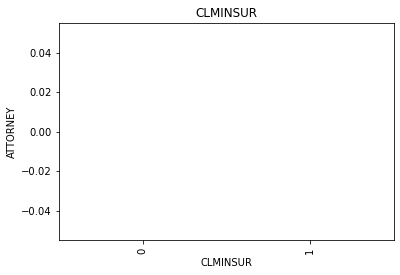

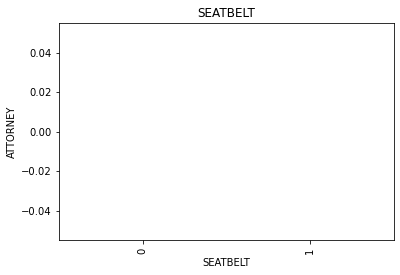

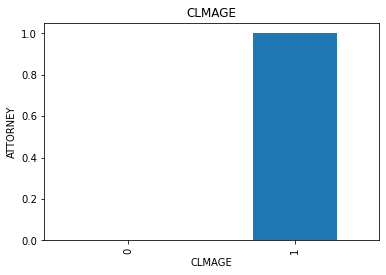

In [45]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    data=df.copy()
    
# Let's make a variable that indicates 1 if the observation was missing or zero
    data[feature]=np.where(data[feature].isnull(),1,0)

# Let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['ATTORNEY'].median().plot.bar()
    plt.ylabel('ATTORNEY')
    plt.title(feature)
    plt.show()

In [7]:
df.CLMINSUR.mode()[0]

1.0

In [26]:
df.CLMAGE.median()

28.414422241529106

In [17]:
#Fill nan values with mode of the categorical column
df["CLMSEX"].fillna(df.CLMSEX.mode()[0],inplace=True) # df.CLMSEX.mode() = 1
df["CLMINSUR"].fillna(df.CLMINSUR.mode()[0],inplace=True) # df.CLMINSUR.mode() = 1
df["SEATBELT"].fillna(df.SEATBELT.mode()[0],inplace=True) # df.SEATBELT.mode() = 0

df.CLMAGE.fillna(df.CLMAGE.median(),inplace=True) # df.CLMAGE.median() = 28.41
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

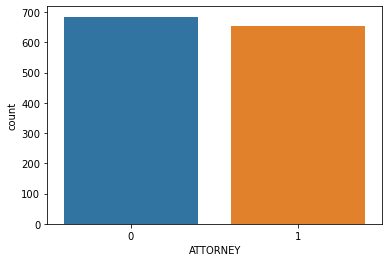

In [10]:
sns.countplot(x="ATTORNEY",data=df)

<AxesSubplot:ylabel='ATTORNEY'>

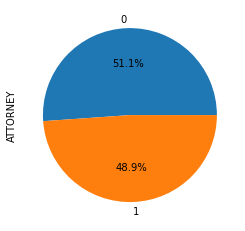

In [11]:
df['ATTORNEY'].value_counts().plot(kind='pie',autopct='%.1f%%')

#### The target in the Data is Balanced. One of the value counts is not more than the other approximately equally distrubuted

<AxesSubplot:xlabel='ATTORNEY'>

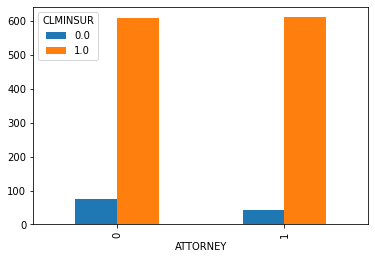

In [12]:
pd.crosstab(df.ATTORNEY,df.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='ATTORNEY'>

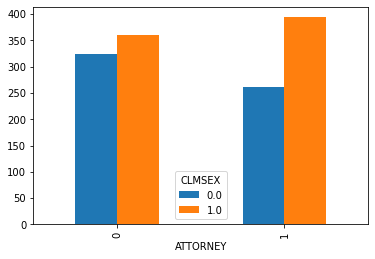

In [59]:
pd.crosstab(df.ATTORNEY,df.CLMSEX).plot(kind="bar")

<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

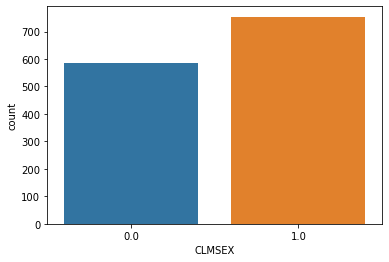

In [13]:
sns.countplot(x="CLMSEX",data=df)

<AxesSubplot:xlabel='CLMSEX'>

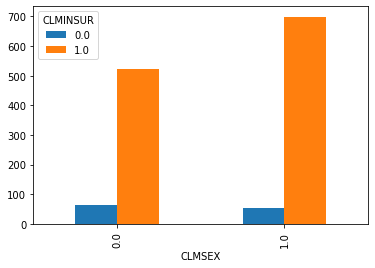

In [14]:
pd.crosstab(df.CLMSEX,df.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

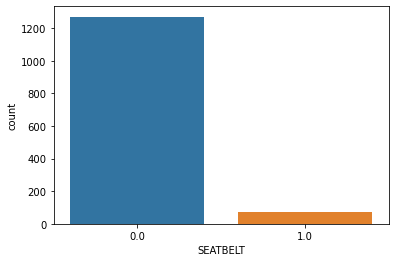

In [15]:
sns.countplot(x="SEATBELT",data=df)

<AxesSubplot:xlabel='SEATBELT'>

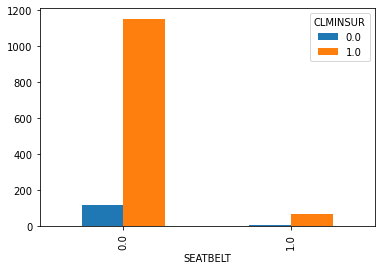

In [16]:
pd.crosstab(df.SEATBELT,df.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='SEATBELT'>

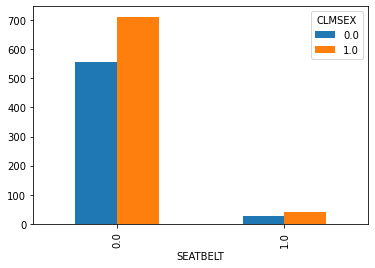

In [58]:
pd.crosstab(df.SEATBELT,df.CLMSEX).plot(kind="bar")

<AxesSubplot:xlabel='CLMINSUR', ylabel='count'>

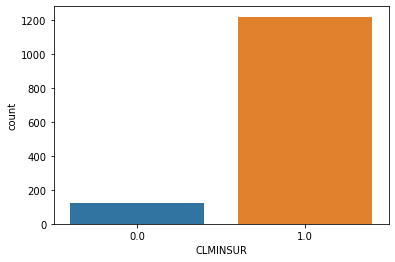

In [17]:
sns.countplot(x="CLMINSUR",data=df)

<AxesSubplot:ylabel='CLMSEX'>

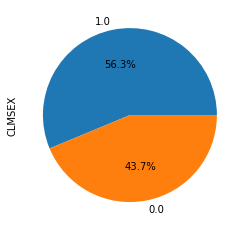

In [18]:
df['CLMSEX'].value_counts().plot(kind='pie',autopct='%.1f%%')

In [19]:
df.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'], dtype='object')

<AxesSubplot:ylabel='CLMINSUR'>

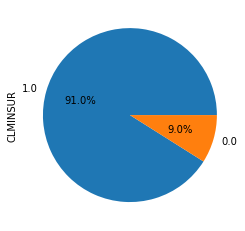

In [20]:
df['CLMINSUR'].value_counts().plot(kind='pie',autopct='%.1f%%')

<AxesSubplot:ylabel='SEATBELT'>

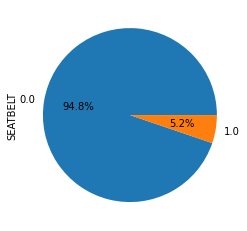

In [21]:
df['SEATBELT'].value_counts().plot(kind='pie',autopct='%.1f%%')

<AxesSubplot:ylabel='CLMINSUR'>

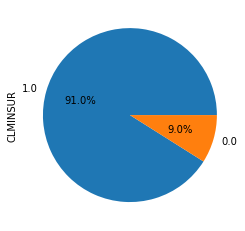

In [22]:
df['CLMINSUR'].value_counts().plot(kind='pie',autopct='%.1f%%')

<AxesSubplot:ylabel='Frequency'>

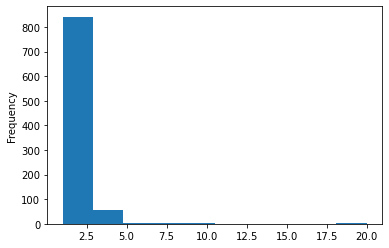

In [23]:
df['LOSS'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

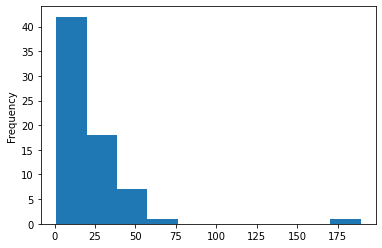

In [27]:
df['CLMAGE'].value_counts().plot(kind='hist')

In [33]:
df.CLMAGE.sort_values()

1260     0.0
608      0.0
74       0.0
615      0.0
1252     0.0
        ... 
618     83.0
853     84.0
1057    86.0
737     88.0
635     95.0
Name: CLMAGE, Length: 1340, dtype: float64

In [47]:
df[df.CLMAGE.values<18]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
2,1,0.0,1.0,0.0,5.0,0.330
6,0,0.0,1.0,0.0,9.0,3.538
12,1,0.0,1.0,0.0,7.0,1.678
15,1,1.0,0.0,0.0,9.0,0.053
18,1,0.0,1.0,0.0,3.0,0.000
...,...,...,...,...,...,...
1328,0,0.0,1.0,0.0,14.0,0.400
1331,0,1.0,1.0,0.0,3.0,0.950
1332,1,1.0,1.0,0.0,9.0,0.000
1334,1,1.0,1.0,0.0,16.0,0.060


In [44]:
df['CLMAGE']<18

0       False
1       False
2        True
3       False
4       False
        ...  
1335    False
1336    False
1337    False
1338     True
1339    False
Name: CLMAGE, Length: 1340, dtype: bool

In [53]:
df.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'], dtype='object')

### ATTORNEY Yes or No Vs CLMSEX

<AxesSubplot:xlabel='ATTORNEY', ylabel='CLMINSUR'>

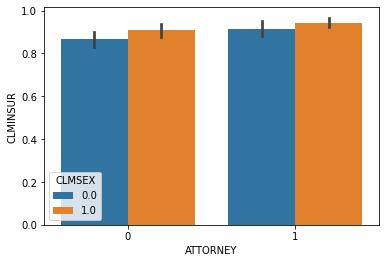

In [60]:
sns.barplot('ATTORNEY','CLMINSUR',hue='CLMSEX',data=df)

<AxesSubplot:xlabel='SEATBELT', ylabel='CLMSEX'>

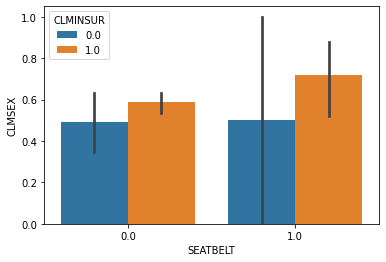

In [66]:
sns.barplot('SEATBELT','CLMSEX',hue='CLMINSUR',data=df[df['CLMAGE']<18])

<AxesSubplot:xlabel='SEATBELT', ylabel='CLMSEX'>

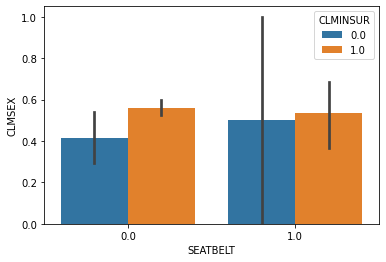

In [67]:
sns.barplot('SEATBELT','CLMSEX',hue='CLMINSUR',data=df[df['CLMAGE']>18])

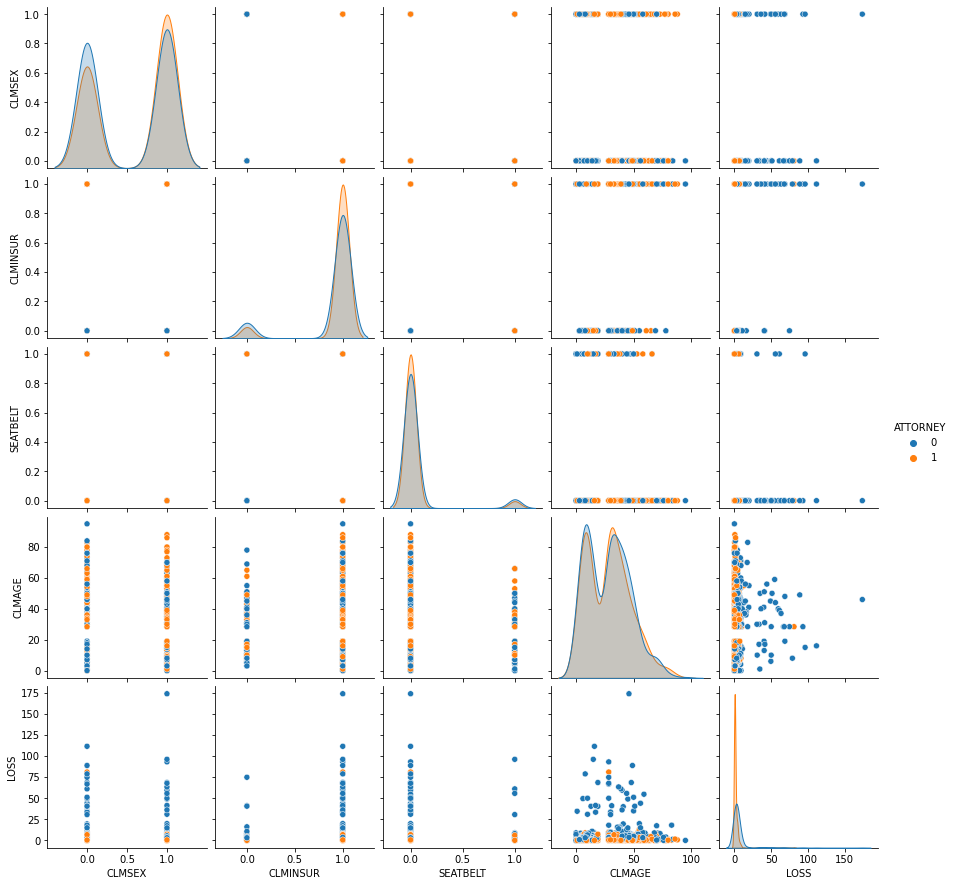

In [68]:
sns.pairplot(df, hue = 'ATTORNEY')

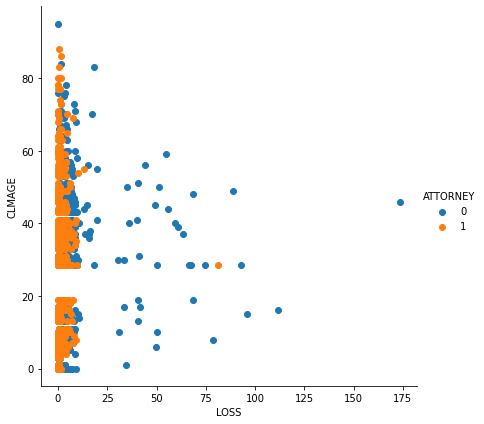

In [69]:
sns.FacetGrid(df, hue = 'ATTORNEY', size = 6).map(plt.scatter,"LOSS",'CLMAGE').add_legend()
plt.show()

### Outlier Detection using Boxplot

<AxesSubplot:>

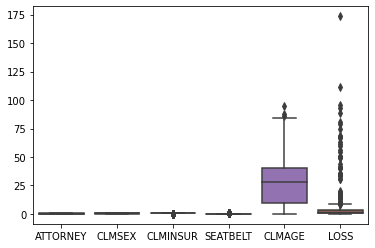

In [71]:
sns.boxplot(data =df,orient = "v")

<AxesSubplot:xlabel='ATTORNEY', ylabel='CLMAGE'>

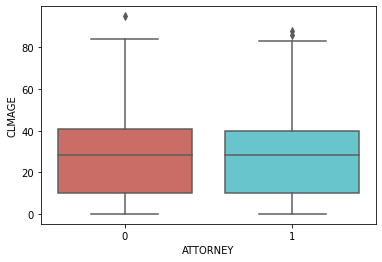

In [73]:
sns.boxplot(x="ATTORNEY",y="CLMAGE",data=df,palette = "hls")

<AxesSubplot:xlabel='ATTORNEY', ylabel='LOSS'>

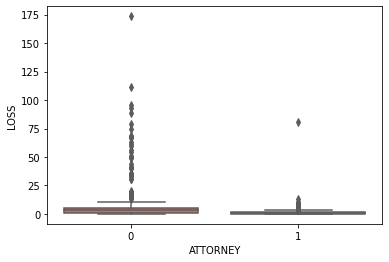

In [74]:
sns.boxplot(x="ATTORNEY",y="LOSS",data=df,palette="hls")

<AxesSubplot:xlabel='CLMSEX', ylabel='CLMAGE'>

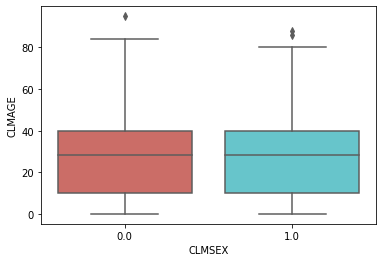

In [77]:
sns.boxplot(x="CLMSEX",y="CLMAGE",data=df,palette="hls")

In [18]:
#Dividing our data into input and output variables
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,30.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [19]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [20]:
# Building a Logistic Regression and fitting the values
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [21]:
classifier.intercept_

array([-0.13616435])

In [22]:
classifier.coef_

array([[ 0.31756644,  0.50430419, -0.52798522,  0.00680276, -0.32257734]])

In [83]:
# Predicting for x dataset
y_pred = classifier.predict(x)

In [84]:
# Creating a datframe to with actual value and predicted value
predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1


In [88]:
# Confusion Matrix to check the Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y,y_pred)
cm

array([[435, 250],
       [147, 508]], dtype=int64)

In [91]:
# Calculting Accuracy for the model
# Accuracy = (TP + TN / TP + TN + FP +FN )* 100
((435+508)/(435+250+147+508))*100

70.3731343283582

In [94]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [ ]:
# ROC curve

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0, 0.5, 'True Positive Rate')

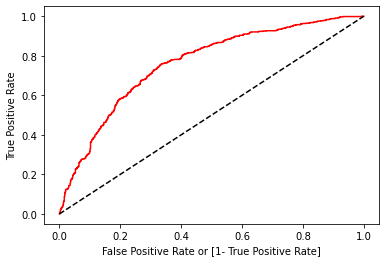

In [105]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)

plt.plot(fpr, tpr, color='red', label='logistic model (area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1- True Positive Rate]')
plt.ylabel('True Positive Rate')

In [109]:
classifier.predict_proba(x)[:,0]

array([0.99997503, 0.4913874 , 0.42154373, ..., 0.28153744, 0.68381839,
       0.33466588])

Text(0, 0.5, 'True Positive Rate')

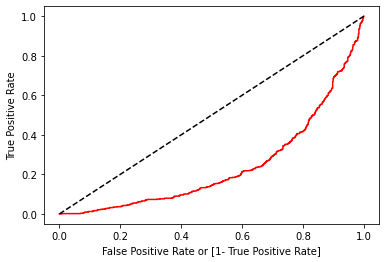

In [106]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,0])

auc = roc_auc_score(y, y_pred)

plt.plot(fpr, tpr, color='red', label='logistic model (area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1- True Positive Rate]')
plt.ylabel('True Positive Rate')

In [107]:
auc

0.7053045077171672

In [108]:
classifier.predict_proba(x)

array([[9.99975026e-01, 2.49742515e-05],
       [4.91387400e-01, 5.08612600e-01],
       [4.21543727e-01, 5.78456273e-01],
       ...,
       [2.81537440e-01, 7.18462560e-01],
       [6.83818393e-01, 3.16181607e-01],
       [3.34665878e-01, 6.65334122e-01]])

In [111]:
y_pred.reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)